In [1]:
# Question 1 - Explain the dataset and the type of information you wish to gain by applying an ensemble method.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


In [2]:
# Question 2 - Explain the ensemble components and how you will be using it in your analysis (list the steps, intuition behind the mathematical representation, and address its assumptions). Specifically, which of max voting, averaging, weighted averaging, bagging, boosting (gradient boosting, random forest, XGBoost, etc.), stacking, blending, and/or other variations have you chosen, and why.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


In [3]:
# Question 3 - Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score

In [4]:
# Question 3 - Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Read the dataset into a data frame
df = pd.read_csv('secondary_data.csv', sep=';', header=0) 

In [5]:
# Question 3 - Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Display the first few rows of the dataframe to verify structure
df.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [6]:
# Question 3 - Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Provides a summary of statistics pertaining to the dataframe’s numerical columns
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [7]:
# Question 3 - Import necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Used to get a concise summary of the dataframe, including the index dtype and column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [8]:
# Question 4 - Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Replace all missing values NaN with "uk" to indicate unknown
df.replace(np.nan, 'uk',  inplace=True)

# Count the number of columns in the dataframe
final_column_count = df.shape[1]
print("Number of columns after data manipulation:", final_column_count)

# Verify the changes to missing values
df.info()

# Display the first few rows of the dataframe to verify structure
df.head(5)	

Number of columns after data manipulation: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,uk,w,16.95,...,s,y,w,u,w,t,g,uk,d,w
1,p,16.60,x,g,o,f,e,uk,w,17.99,...,s,y,w,u,w,t,g,uk,d,u
2,p,14.07,x,g,o,f,e,uk,w,17.80,...,s,y,w,u,w,t,g,uk,d,w
3,p,14.17,f,h,e,f,e,uk,w,15.77,...,s,y,w,u,w,t,p,uk,d,w
4,p,14.64,x,h,o,f,e,uk,w,16.53,...,s,y,w,u,w,t,p,uk,d,w


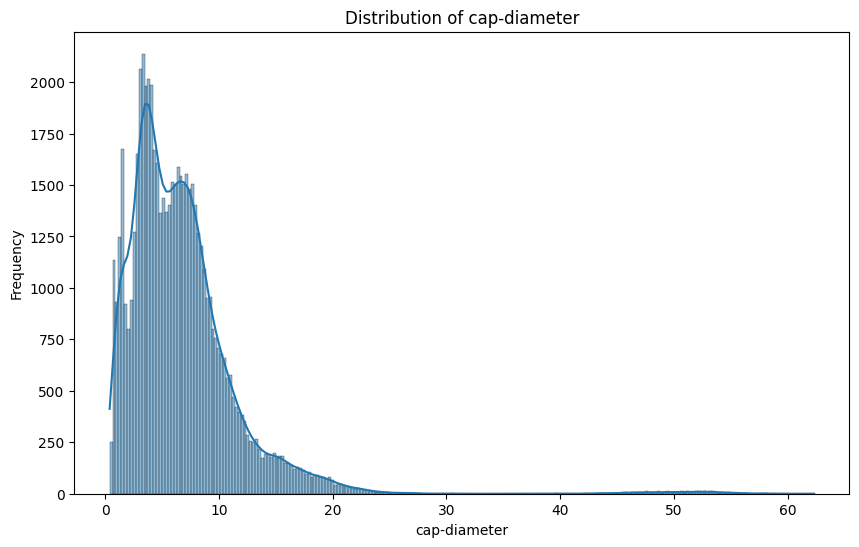

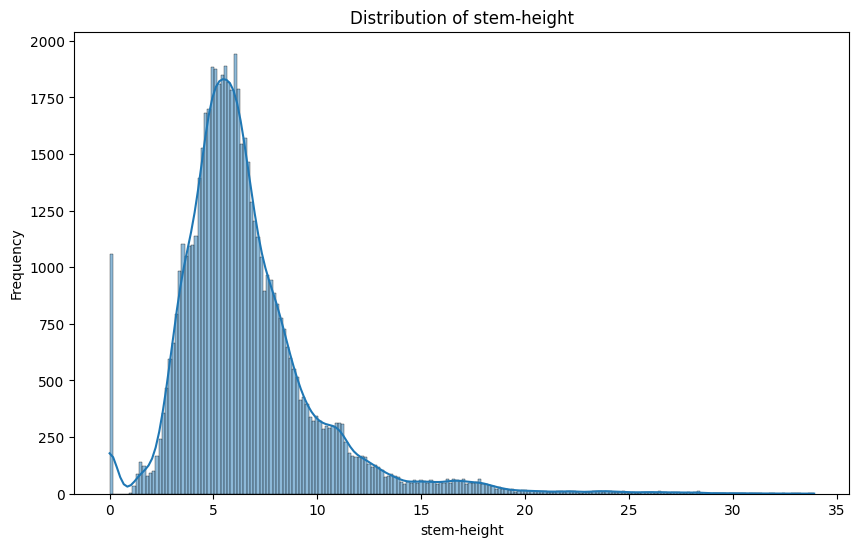

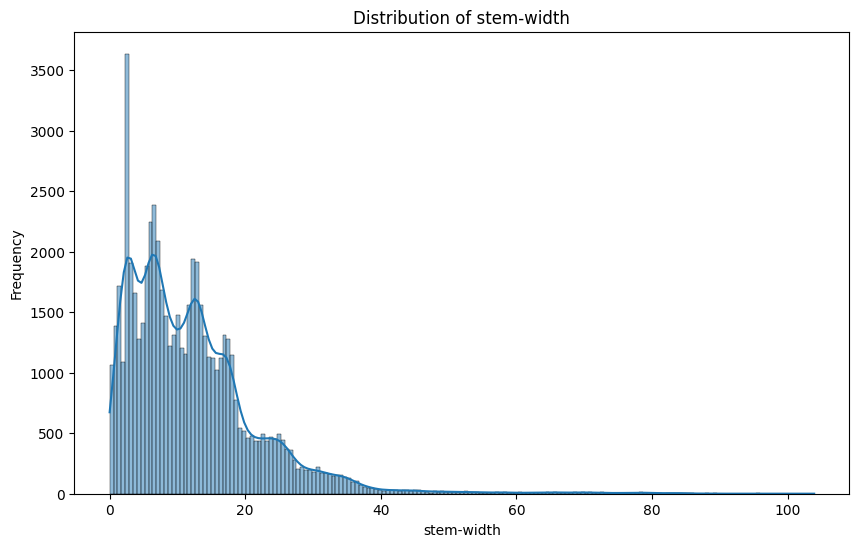

In [9]:
# Question 4 - Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

#Distribution histograms
columns = ['cap-diameter', 'stem-height', 'stem-width']

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()	

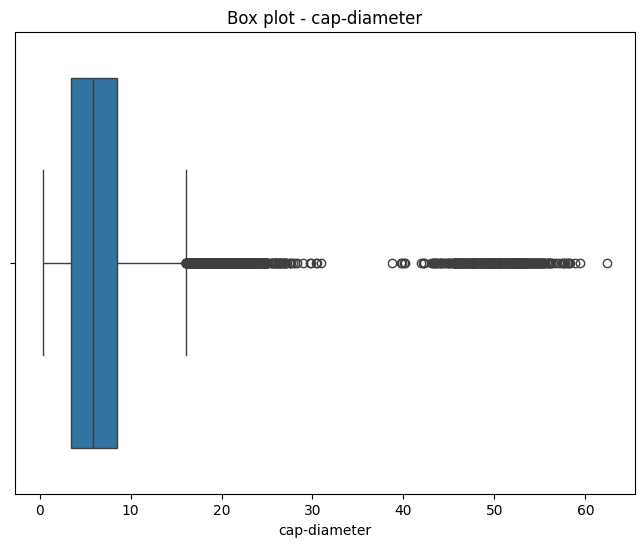

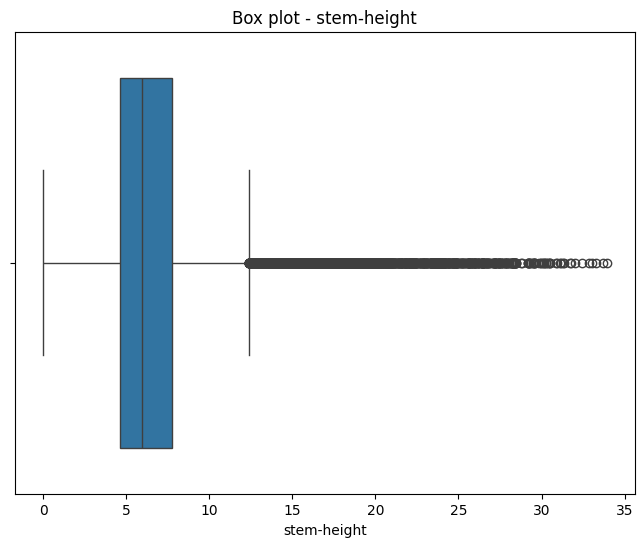

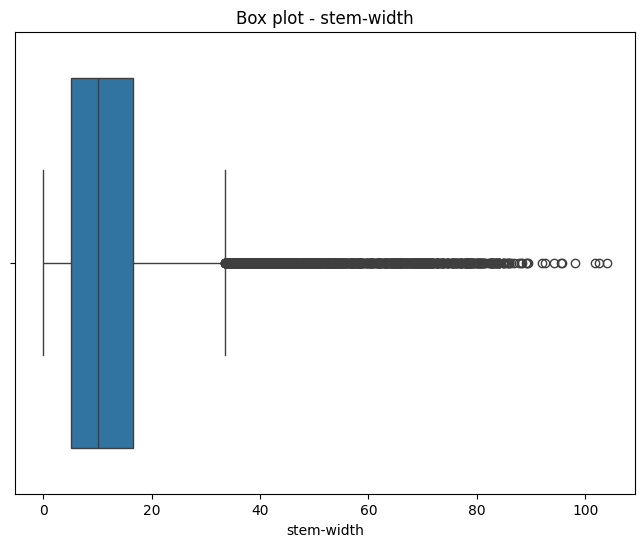

In [10]:
# Question 4 - Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Outliers boxplots
columns = ['cap-diameter', 'stem-height', 'stem-width']

for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title('Box plot - {}'.format(column))
    plt.show()	

In [11]:
# Question 4 - Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Outliers boxplot metrics extracted 
for column in ['cap-diameter', 'stem-height', 'stem-width']:
    # Get summary statistics
    summary = df[column].describe()
    
    # Calculate IQR
    IQR = summary['75%'] - summary['25%']
    
    # Calculate whiskers
    lower_whisker = summary['25%'] - 1.5 * IQR
    upper_whisker = summary['75%'] + 1.5 * IQR
    
    # Calculate the number of records below the lower whisker and above the upper whisker
    num_below_lower_whisker = df[df[column] < lower_whisker].shape[0]
    num_above_upper_whisker = df[df[column] > upper_whisker].shape[0]
    
    # Calculate the percentage of total values below the lower whisker and above the upper whisker
    percent_below_lower_whisker = (num_below_lower_whisker / df.shape[0]) * 100
    percent_above_upper_whisker = (num_above_upper_whisker / df.shape[0]) * 100
    
    # Output all the results
    print(f"Column: {column}")
    print(f"  Min: {summary['min']}")
    print(f"  Records below Lower Whisker: {num_below_lower_whisker}")
    print(f"  Percentage below Lower Whisker: {percent_below_lower_whisker:.2f}%")
    print(f"  Lower Whisker (25th percentile - 1.5 * IQR): {max(lower_whisker, summary['min'])}")
    print(f"  Median: {summary['50%']}")
    print(f"  Upper Whisker (75th percentile + 1.5 * IQR): {min(upper_whisker, summary['max'])}")
    print(f"  Records above Upper Whisker: {num_above_upper_whisker}")
    print(f"  Percentage above Upper Whisker: {percent_above_upper_whisker:.2f}%")
    print(f"  Max: {summary['max']}\n")	

Column: cap-diameter
  Min: 0.38
  Records below Lower Whisker: 0
  Percentage below Lower Whisker: 0.00%
  Lower Whisker (25th percentile - 1.5 * IQR): 0.38
  Median: 5.86
  Upper Whisker (75th percentile + 1.5 * IQR): 16.129999999999995
  Records above Upper Whisker: 2400
  Percentage above Upper Whisker: 3.93%
  Max: 62.34

Column: stem-height
  Min: 0.0
  Records below Lower Whisker: 0
  Percentage below Lower Whisker: 0.00%
  Lower Whisker (25th percentile - 1.5 * IQR): 0.0
  Median: 5.95
  Upper Whisker (75th percentile + 1.5 * IQR): 12.39
  Records above Upper Whisker: 3169
  Percentage above Upper Whisker: 5.19%
  Max: 33.92

Column: stem-width
  Min: 0.0
  Records below Lower Whisker: 0
  Percentage below Lower Whisker: 0.00%
  Lower Whisker (25th percentile - 1.5 * IQR): 0.0
  Median: 10.19
  Upper Whisker (75th percentile + 1.5 * IQR): 33.61
  Records above Upper Whisker: 1967
  Percentage above Upper Whisker: 3.22%
  Max: 103.91



In [12]:
# Question 4 - Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Encoding "class" column: Poisonous (p) as 0, Edible (e) as 1
df['class'] = df['class'].replace({'p': '0', 'e': '1'}).astype(int)

# Encoding "does-bruise-or-bleed" column: False (f) as 0, True (t) as 1
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].replace({'f': '0', 't': '1'}).astype(int)

# Encoding "veil-type" column: False (uk) as 0, True (u) as 1
df['veil-type'] = df['veil-type'].replace({'uk': '0', 'u': '1'}).astype(int)

# Encoding "has-ring" column: False (f) as 0, True (t) as 1
df['has-ring'] = df['has-ring'].replace({'f': '0', 't': '1'}).astype(int)

#  Encode specific columns below via one-hot encoding
df = pd.get_dummies(df, columns=[
    'cap-shape',
    'cap-surface',
    'cap-color',
    'gill-attachment',
    'gill-spacing',
    'gill-color',
    'stem-root',
    'stem-surface',
    'stem-color',
    'veil-color',
    'ring-type',
    'spore-print-color',
    'habitat',
    'season'
])

# Convert True/False to 1/0
df = df.map(lambda x: 1 if x == True else 0 if x == False else x)

# Count the number of columns in the dataframe
final_column_count = df.shape[1]
print("Number of columns after data manipulation:", final_column_count)

# Display the first few rows of the dataframe to verify structure
df.head(5)	

Number of columns after data manipulation: 126


,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,veil-type,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,15.26,0,16.95,17.09,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,16.60,0,17.99,18.19,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,14.07,0,17.80,17.74,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,14.17,0,15.77,15.98,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,14.64,0,16.53,17.20,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# Question 4 - Clean the data and address unusual phenomena (e.g., normalization, feature scaling, outliers); use illustrative diagrams and plots and explain them.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be normalized ranging from 0 to 1
columns_to_normalize = ['cap-diameter', 'stem-height', 'stem-width']

# Apply MinMaxScaler normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Count the number of columns in the dataframe
final_column_count = df.shape[1]
print("Number of columns after data manipulation:", final_column_count)

# Display the first few rows of the dataframe to verify the changes
df.head(5)	

Number of columns after data manipulation: 126


,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,veil-type,has-ring,cap-shape_b,cap-shape_c,cap-shape_f,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,0.240155,0,0.499705,0.164469,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.261782,0,0.530366,0.175055,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.220949,0,0.524764,0.170725,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.222563,0,0.464917,0.153787,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0.230148,0,0.487323,0.165528,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Question 5 - Formulate two questions that can be answered by employing the ensemble learning

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


In [15]:
# Question 6 - If appropriate and relevant to your model, split the data into training and testing sets.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Separate features and target variable
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variabl

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Question 7 - Provide a diagram that illustrates how the ensemble components are combined into one learning model.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


In [17]:
# Question 8 - Implement and execute the ensemble learning model. Explain the intuition behind each mathematical step.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=10, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)

In [18]:
# Question 8 - Implement and execute the ensemble learning model. Explain the intuition behind each mathematical step.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42))
]

# Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier(n_estimators=10, random_state=42))
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=42))],
                   final_estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=42))

In [19]:
# Question 8 - Implement and execute the ensemble learning model. Explain the intuition behind each mathematical step.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Making predictions with the stacking classifier
stacked_predictions = stacking_classifier.predict(X_test)

In [20]:
# Question 9 - Answer the questions you formulated using the results obtained from executing the ensemble model.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Extract the probabilities of being poisonous or edible from stacking classifier
probabilities = stacking_classifier.predict_proba(X_test)

# Create a dataframe with only the probability columns
probability_df = pd.DataFrame(probabilities, columns=['Prob_Poisonous', 'Prob_Edible'])

# Probability dataframe ranked by top poisonous
top_poisonous = probability_df.sort_values(by='Prob_Poisonous', ascending=False).head(5)

# Probability dataframe ranked by top edible
top_edible = probability_df.sort_values(by='Prob_Edible', ascending=False).head(5)

In [21]:
# Question 9 - Answer the questions you formulated using the results obtained from executing the ensemble model.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Top poisonous dataframe
top_poisonous

,Prob_Poisonous,Prob_Edible
4228,1.0,0.0
5369,1.0,0.0
5384,1.0,0.0
9797,1.0,0.0
5382,1.0,0.0


In [22]:
# Question 9 - Answer the questions you formulated using the results obtained from executing the ensemble model.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Top edible dataframe
top_edible

,Prob_Poisonous,Prob_Edible
0,0.0,1.0
6495,0.0,1.0
6515,0.0,1.0
6514,0.0,1.0
6513,0.0,1.0


In [23]:
# Question 10 - Interpret the predictions made by the model in the context of the questions you asked.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


Confusion Matrix:
 [[6840    0]
 [   0 5374]]


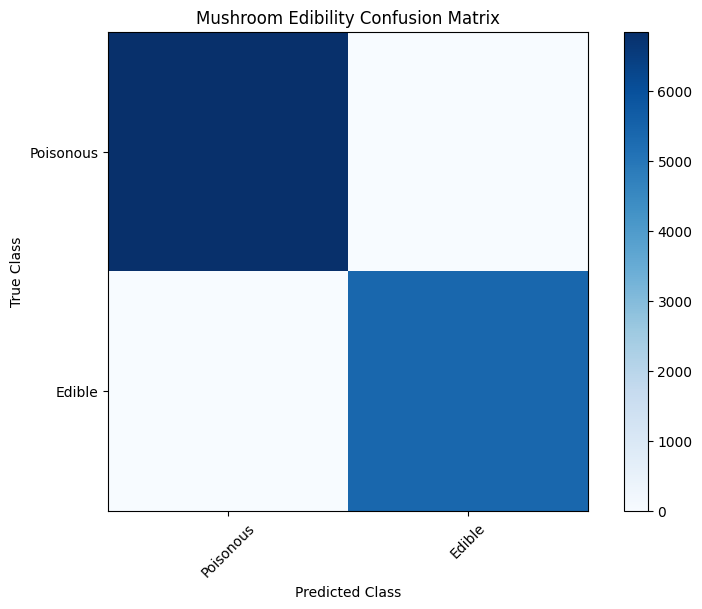

In [24]:
# Question 11 - Validate your model using relevant validation metrics such as a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, stacked_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Mushroom Edibility Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
classes = ['Poisonous', 'Edible']
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [25]:
# Question 11 - Validate your model using relevant validation metrics such as a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Accuracy Score
accuracy = accuracy_score(y_test, stacked_predictions)
print(f'Accuracy Score: {accuracy*100:.2f}%')

Accuracy Score: 100.00%


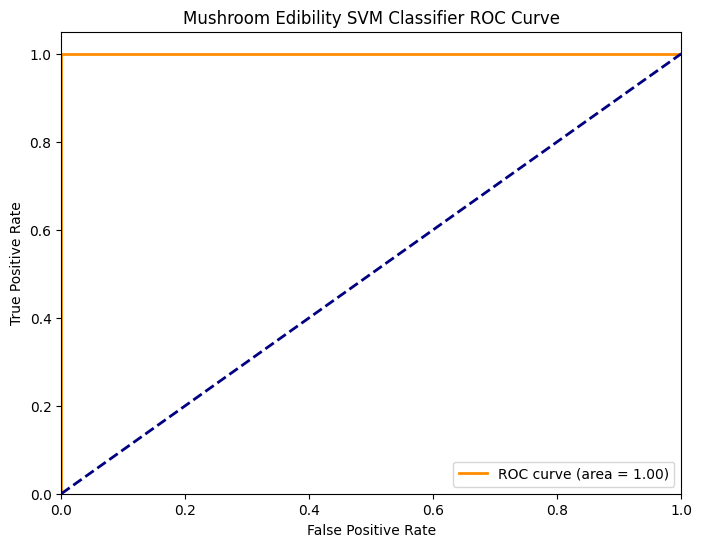

In [26]:
# Question 11 - Validate your model using relevant validation metrics such as a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# Get the probability scores for the positive class
stacked_predictions = stacking_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the binary classification
fpr, tpr, _ = roc_curve(y_test, stacked_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mushroom Edibility SVM Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
# Question 11 - Validate your model using relevant validation metrics such as a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then, explain the results.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)

# k-Fold Cross Validation
cv_scores = cross_val_score(stacking_classifier, X_train, y_train, cv=10)
print(f'CV Average Score: {cv_scores.mean()*100:.2f}%')

CV Average Score: 100.00%


In [28]:
# Question 12 - Explain how ensemble system reduced the variance.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


In [29]:
# Question 13 - Include all mathematical formulas used and graphs representing the final outcomes.

## (See the Microsoft Word document report for explanations, justifications, and analysis of all Jupyter Notebook code, outputs, graphs, and illustrations)


In [30]:
References ='''

References:

Stack Overflow. (n.d.). Retrieved January, 2024, from https://stackoverflow.com/

Reddit. (n.d.). Retrieved January, 2024, from https://www.reddit.com/

GitHub. (n.d.). Retrieved January, 2024, from https://www.github.com/

Towards Data Science. (n.d.). Retrieved January, 2024, from https://towardsdatascience.com/

DataCamp Community. (n.d.). Retrieved January, 2024, from https://www.datacamp.com/community

Chih-Chung Chang and Chih-Jen Lin, LIBSVM : a library for support vector machines. 
ACM Transactions on Intelligent Systems and Technology, 2:27:1--27:27, 2011. Software available at http://www.csie.ntu.edu.tw/~cjlin/libsvm

'''